# Lesson 1 - Working Notes

Always import all the valuable libraries!

In [25]:
import math
import numpy
from matplotlib import pyplot

We want to make a 50x50 mesh grid to use in plotting our source/sink garbage, ranging x,y=[-2,2],[-1,1]

In [26]:
n = 50
xa, xz = -2.0, 2.0
ya, yz = -1.0, 1.0
x = numpy.linspace(xa,xz,n)
y = numpy.linspace(ya,yz,n)
print('x =', x)
print('y =', y)

X,Y = numpy.meshgrid(x,y)

x = [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y = [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26

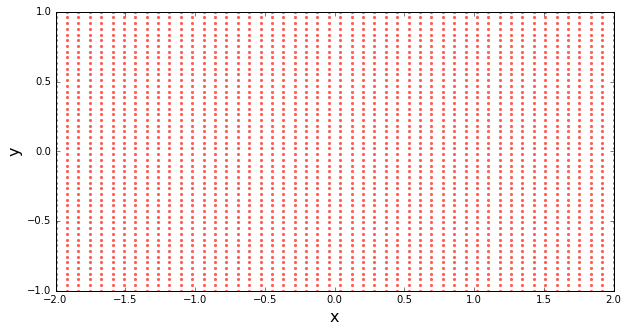

In [42]:
# now we want to plot the grid
%matplotlib inline
size = 10
pyplot.figure(figsize=(size, (yz-ya)/(xz-xa)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(xa, xz)
pyplot.ylim(ya, yz)
pyplot.scatter(X, Y, s=10, color='#FE5F55', marker='o', linewidth=0)

In [36]:
strength_source = 5.0                      # source strength
x_source, y_source = -1.0, 0.3             # location of the source

# compute the velocity field on the mesh grid
u_source = strength_source/(2*math.pi) * (X-x_source)/((X-x_source)**2 + (Y-y_source)**2)
v_source = strength_source/(2*math.pi) * (Y-y_source)/((X-x_source)**2 + (Y-y_source)**2)

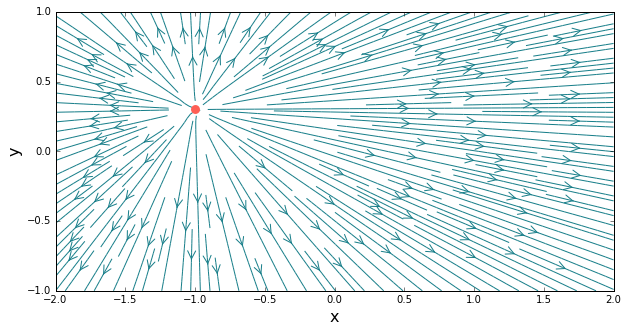

In [43]:
# plot the streamlines
%matplotlib inline
size = 10
pyplot.figure(figsize=(size, (ya-yz)/(xa-xz)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xa, xz)
pyplot.ylim(ya, yz)
pyplot.streamplot(X, Y, u_source, v_source, color='#177E89', density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#FE5F55', s=80, marker='o', linewidth=0)

In [38]:
strength_sink = -6.0        # strength of the sink
x_sink, y_sink = 1.0,0.0     # location of the sink

# compute the velocity on the mesh grid

u_sink = strength_sink/(2*math.pi)*(X-x_sink)/((X-x_sink)**2+(Y-y_sink)**2)
v_sink = strength_sink/(2*math.pi)*(Y-y_sink)/((X-x_sink)**2+(Y-y_sink)**2)

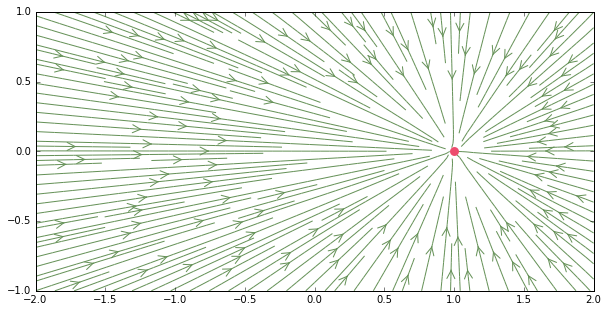

In [45]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size,(yz-ya)/(xz-xa)*size))
pyplot.xlim(xa, xz)
pyplot.ylim(ya, yz)
pyplot.streamplot(X, Y, u_sink, v_sink, color='#659157', density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink, color='#ED4D6E', s=80, marker='o', linewidth=0)

# Now let's put them both together

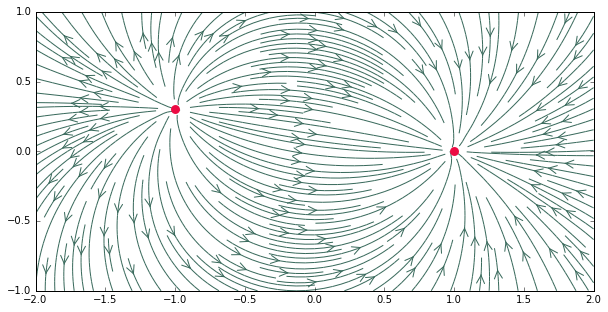

In [52]:
# compute the velocity of the pair source/sink by superposition
u_pair = u_source+u_sink
v_pair = v_source+v_sink

# plot them together
size = 10
pyplot.figure(figsize=(size,(yz-ya)/(xz-xa)*size))
pyplot.xlim(xa, xz)
pyplot.ylim(ya, yz)
pyplot.streamplot(X, Y, u_pair, v_pair, color='#38695B', density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink],[y_source, y_sink], color='#EC0B43', s=80, marker='o', linewidth=0)

# Note to self: work on the challenge problem